# Smart Lead Scoring Engine

In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import classification_report, f1_score, confusion_matrix


In [2]:
from sklearn.impute import KNNImputer


In [3]:
train = pd.read_csv("train_wn75k28.csv")
test= pd.read_csv("test_Wf7sxXF.csv")

In [4]:
train.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
count,39161.000000,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,19581.000000,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562,0.051020
std,11304.951283,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696,0.220042
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9791.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19581.000000,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29371.000000,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39161.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [5]:
train[(train['products_purchased'].isna()) & (train['buy']==0)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,0,1,0,0,0,0,1,0,0
11,12,2021-01-01,7,4,NaN,NaN,1,0,0,0,0,1,0,1,0,0,0,0,0
14,15,2021-01-01,4,7,NaN,2019-05-03,0,0,0,0,0,1,0,0,0,0,1,0,0
15,16,2021-01-01,7,2,NaN,2021-03-09,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39150,39151,2021-12-31,11,6,NaN,NaN,0,0,1,0,1,0,0,1,0,0,0,0,0
39152,39153,2021-12-31,10,9,NaN,NaN,0,0,0,0,0,1,0,1,0,0,0,0,0
39153,39154,2021-12-31,15,14,NaN,NaN,0,0,0,0,0,1,0,0,0,0,1,0,0
39155,39156,2021-12-31,4,2,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1,0,0


In [6]:
train[(train['products_purchased'].isna()) & (train['buy']==1)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
173,174,2021-01-05,6,3,NaN,2020-11-13,0,1,0,0,1,0,0,0,0,0,0,0,1
178,179,2021-01-06,8,9,NaN,2018-07-23,1,0,0,1,1,0,0,0,1,0,0,0,1
305,306,2021-01-09,5,7,NaN,2021-05-27,1,0,0,0,0,0,0,0,0,0,0,0,1
326,327,2021-01-10,3,6,NaN,2017-01-10,0,0,0,1,0,1,0,0,0,0,0,0,1
345,346,2021-01-10,5,8,NaN,2020-06-05,1,0,0,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38871,38872,2021-12-30,3,6,NaN,2020-11-17,0,0,0,0,1,0,0,0,0,0,1,0,1
38964,38965,2021-12-30,5,6,NaN,2020-03-01,1,0,0,0,1,1,1,1,1,0,0,0,1
39071,39072,2021-12-31,6,6,NaN,2021-01-01,0,0,1,1,1,1,0,0,0,0,1,0,1
39129,39130,2021-12-31,6,6,NaN,2019-05-19,1,0,0,0,0,1,0,0,0,0,1,0,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 14  user_activity_var_9   39161 non-null  int64  
 15  user_activity_var_1

In [8]:
print("signup_date :",train.signup_date.nunique())
print("created_at :",train.created_at.nunique())
print("campaign_var_1 :",train.campaign_var_1.nunique())
print("campaign_var_2 :",train.campaign_var_2.nunique())
print("products_purchased :",train.products_purchased.nunique())

signup_date : 1800
created_at : 365
campaign_var_1 : 16
campaign_var_2 : 15
products_purchased : 4


In [9]:
train['signup_date'].value_counts()

2021-07-18    45
2021-01-28    38
2021-09-10    38
2021-09-20    38
2021-08-03    38
              ..
2016-11-08     1
2017-11-20     1
2018-03-01     1
2016-10-28     1
2018-03-12     1
Name: signup_date, Length: 1800, dtype: int64

In [10]:
train['created_at'].value_counts()

2021-12-26    181
2021-12-09    180
2021-12-07    179
2021-12-21    179
2021-12-04    178
             ... 
2021-01-07     34
2021-01-14     33
2021-01-06     29
2021-01-22     26
2021-01-01     21
Name: created_at, Length: 365, dtype: int64

In [11]:
# Check the value counts for the column 

train['products_purchased'].value_counts()

2.0    8867
3.0    5024
1.0    3643
4.0     716
Name: products_purchased, dtype: int64

In [12]:
# Check the value counts for the column 

train['campaign_var_1'].value_counts()

6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64

In [13]:
# Check the value counts for the column 

train['campaign_var_2'].value_counts()

6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64

In [14]:
train['buy'].value_counts()

0    37163
1     1998
Name: buy, dtype: int64

In [15]:
train[train.duplicated(keep=False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy


In [16]:
test[test.duplicated(keep=False)]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12


In [17]:
# check for percentage of null values in each column

percent_missing = round(100*(train.isnull().sum()/len(train.index)), 2)
print(percent_missing)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      53.40
signup_date             38.59
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
buy                      0.00
dtype: float64


In [18]:
# check for percentage of null values in each column

percent_missing_test = round(100*(test.isnull().sum()/len(train.index)), 2)
print(percent_missing_test)

id                       0.00
created_at               0.00
campaign_var_1           0.00
campaign_var_2           0.00
products_purchased      20.78
signup_date             16.98
user_activity_var_1      0.00
user_activity_var_2      0.00
user_activity_var_3      0.00
user_activity_var_4      0.00
user_activity_var_5      0.00
user_activity_var_6      0.00
user_activity_var_7      0.00
user_activity_var_8      0.00
user_activity_var_9      0.00
user_activity_var_10     0.00
user_activity_var_11     0.00
user_activity_var_12     0.00
dtype: float64


In [19]:
#train.signup_date = pd.to_datetime(train.signup_date)
train.created_at = pd.to_datetime(train.created_at)
#difference = (train.created_at-train.signup_date )
train['day_of_week'] = train['created_at'].dt.day_name()
#train['d']=train['day_of_week'].dt.day_of_week
train['day'] = train['created_at'].dt.strftime("%w")
train['quarter'] = pd.to_datetime(train['created_at']).dt.quarter


In [20]:
test.created_at = pd.to_datetime(test.created_at)
test['day_of_week'] = test['created_at'].dt.day_name()
test['day'] = test['created_at'].dt.strftime("%w")
test['quarter'] = pd.to_datetime(test['created_at']).dt.quarter

In [21]:
train.groupby(train.created_at).groups

{Timestamp('2021-01-01 00:00:00'): Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
             19, 20],
            dtype='int64'),
 Timestamp('2021-01-02 00:00:00'): Int64Index([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
             38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
             55, 56, 57, 58, 59, 60, 61, 62, 63],
            dtype='int64'),
 Timestamp('2021-01-03 00:00:00'): Int64Index([ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
              77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
              90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
            dtype='int64'),
 Timestamp('2021-01-04 00:00:00'): Int64Index([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
             115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
             128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
            dtype

In [22]:
grouped=train.groupby('created_at')

In [23]:
print(grouped.get_group('2021-01-01')) ,print(grouped.get_group('2021-01-02'))

    id created_at  campaign_var_1  campaign_var_2  products_purchased  \
0    1 2021-01-01               1               2                 2.0   
1    2 2021-01-01               2               1                 2.0   
2    3 2021-01-01               9               3                 3.0   
3    4 2021-01-01               6               7                 2.0   
4    5 2021-01-01               4               6                 NaN   
5    6 2021-01-01               3               4                 3.0   
6    7 2021-01-01               5               1                 1.0   
7    8 2021-01-01               7               3                 NaN   
8    9 2021-01-01              13               6                 3.0   
9   10 2021-01-01               3               6                 2.0   
10  11 2021-01-01               1               1                 1.0   
11  12 2021-01-01               7               4                 NaN   
12  13 2021-01-01               2               6  

(None, None)

In [24]:
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,...,1,1,0,0,0,0,0,Friday,5,1
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,...,1,0,0,0,0,0,0,Friday,5,1
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4


In [25]:
train.tail(50)

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
39111,39112,2021-12-31,4,4,NaN,NaN,1,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39112,39113,2021-12-31,6,7,3.0,NaN,0,0,0,0,...,1,1,0,0,0,0,0,Friday,5,4
39113,39114,2021-12-31,4,4,NaN,NaN,0,0,1,0,...,0,0,0,0,0,0,0,Friday,5,4
39114,39115,2021-12-31,5,5,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39115,39116,2021-12-31,1,1,3.0,2021-07-10,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,4
39116,39117,2021-12-31,6,7,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39117,39118,2021-12-31,16,13,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4
39118,39119,2021-12-31,6,8,2.0,2021-06-04,1,0,0,0,...,1,0,0,0,0,0,0,Friday,5,4
39119,39120,2021-12-31,15,12,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39120,39121,2021-12-31,8,8,2.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,4


In [26]:

train['user_activity_var_3'].value_counts()

0    35134
1     4027
Name: user_activity_var_3, dtype: int64

In [27]:
train['user_activity_var_2'].value_counts()

0    38898
1      263
Name: user_activity_var_2, dtype: int64

In [28]:
train['user_activity_var_4'].value_counts()

0    38712
1      449
Name: user_activity_var_4, dtype: int64

In [29]:
train['user_activity_var_10'].value_counts()

0    39146
1       15
Name: user_activity_var_10, dtype: int64

In [30]:
train['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [31]:
train['day'].value_counts()

1    5672
0    5630
4    5596
3    5580
5    5572
6    5570
2    5541
Name: day, dtype: int64

In [32]:
train['quarter'].value_counts()

4    14233
3    11794
2     8372
1     4762
Name: quarter, dtype: int64

In [33]:
train[train['day_of_week'].isna() | train['products_purchased'].isna()]

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,...,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day_of_week,day,quarter
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,...,1,0,0,0,1,0,0,Friday,5,1
7,8,2021-01-01,7,3,NaN,2020-12-12,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,1
11,12,2021-01-01,7,4,NaN,NaN,1,0,0,0,...,0,1,0,0,0,0,0,Friday,5,1
14,15,2021-01-01,4,7,NaN,2019-05-03,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,1
15,16,2021-01-01,7,2,NaN,2021-03-09,0,0,0,0,...,0,0,0,0,0,0,0,Friday,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39150,39151,2021-12-31,11,6,NaN,NaN,0,0,1,0,...,0,1,0,0,0,0,0,Friday,5,4
39152,39153,2021-12-31,10,9,NaN,NaN,0,0,0,0,...,0,1,0,0,0,0,0,Friday,5,4
39153,39154,2021-12-31,15,14,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4
39155,39156,2021-12-31,4,2,NaN,NaN,0,0,0,0,...,0,0,0,0,1,0,0,Friday,5,4


In [34]:
train_df = train.drop(['signup_date', 'day_of_week', 'created_at','id','products_purchased'], axis=1)

In [35]:
test_df = test.drop(['signup_date', 'day_of_week', 'created_at','id','products_purchased'], axis=1)

In [36]:
train_df

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
4,4,6,0,0,0,0,0,0,1,0,0,0,1,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,11,11,1,0,0,0,1,1,1,0,0,0,0,0,0,5,4
39157,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,5,4
39158,8,7,1,0,0,0,1,0,1,0,0,0,0,0,0,5,4
39159,7,12,0,0,0,0,0,1,0,0,0,0,1,0,0,5,4


In [37]:
train_df.head(4)

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1


In [38]:
train_df['day']= train_df['day'].astype('int64')
#train_df['products_purchased']= train_df['products_purchased'].astype('int64')

In [39]:
test_df['day']= test_df['day'].astype('int64')
#test_df['products_purchased']= test_df['products_purchased'].astype('int64')

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        39161 non-null  int64
 1   campaign_var_2        39161 non-null  int64
 2   user_activity_var_1   39161 non-null  int64
 3   user_activity_var_2   39161 non-null  int64
 4   user_activity_var_3   39161 non-null  int64
 5   user_activity_var_4   39161 non-null  int64
 6   user_activity_var_5   39161 non-null  int64
 7   user_activity_var_6   39161 non-null  int64
 8   user_activity_var_7   39161 non-null  int64
 9   user_activity_var_8   39161 non-null  int64
 10  user_activity_var_9   39161 non-null  int64
 11  user_activity_var_10  39161 non-null  int64
 12  user_activity_var_11  39161 non-null  int64
 13  user_activity_var_12  39161 non-null  int64
 14  buy                   39161 non-null  int64
 15  day                   39161 non-null  int64
 16  quar

In [41]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   campaign_var_1        13184 non-null  int64
 1   campaign_var_2        13184 non-null  int64
 2   user_activity_var_1   13184 non-null  int64
 3   user_activity_var_2   13184 non-null  int64
 4   user_activity_var_3   13184 non-null  int64
 5   user_activity_var_4   13184 non-null  int64
 6   user_activity_var_5   13184 non-null  int64
 7   user_activity_var_6   13184 non-null  int64
 8   user_activity_var_7   13184 non-null  int64
 9   user_activity_var_8   13184 non-null  int64
 10  user_activity_var_9   13184 non-null  int64
 11  user_activity_var_10  13184 non-null  int64
 12  user_activity_var_11  13184 non-null  int64
 13  user_activity_var_12  13184 non-null  int64
 14  day                   13184 non-null  int64
 15  quarter               13184 non-null  int64
dtypes: i

In [42]:
test_df.head(4)

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,day,quarter
0,2,2,1,1,0,0,0,1,0,0,0,0,1,0,6,1
1,4,7,1,0,0,0,0,0,0,1,0,0,0,0,6,1
2,8,7,0,0,0,0,1,1,0,0,0,0,0,0,6,1
3,9,8,0,0,0,0,1,1,1,0,0,0,2,0,6,1


In [43]:
train_df.head(4)

,campaign_var_1,campaign_var_2,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,day,quarter
0,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,5,1
1,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,5,1
2,9,3,1,0,0,0,0,0,0,0,0,0,0,0,0,5,1
3,6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1


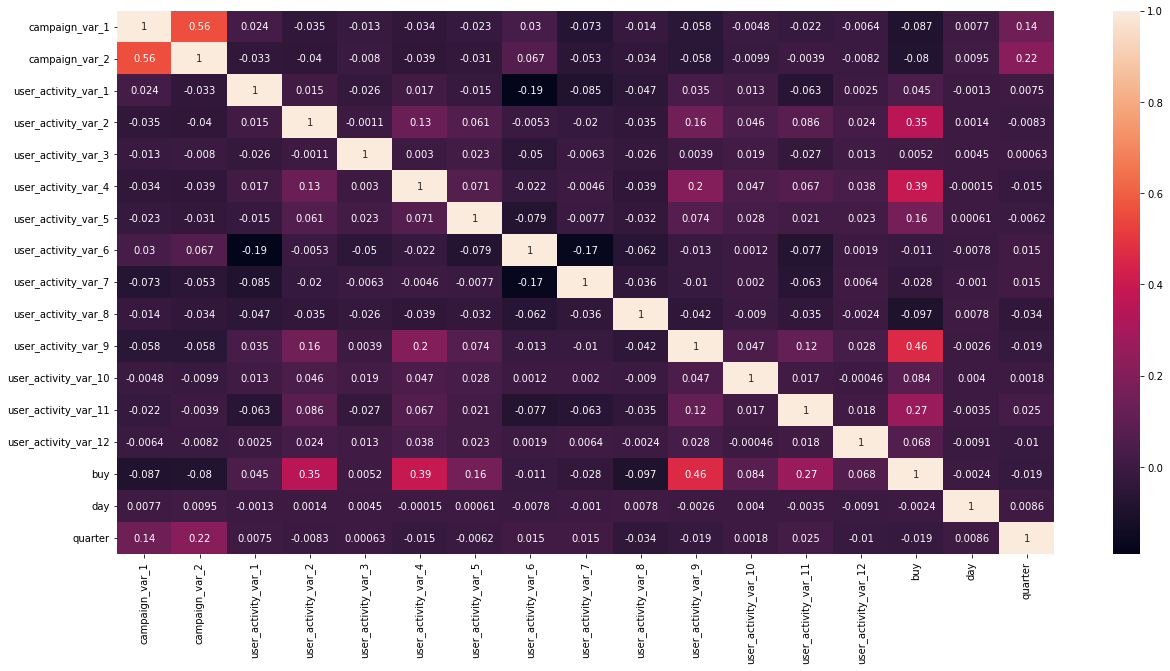

In [44]:
plt.figure(figsize = (21,10))
sns.heatmap(train_df.corr(), annot=True)

In [45]:
# train test split

X = train_df.loc[:,train_df.columns != 'buy']
y = train_df.buy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [46]:
print('X_train & y_train shape: ',X_train.shape,y_train.shape)
print('X_test & y_test shape: ',X_test.shape,y_test.shape)

X_train & y_train shape:  (31328, 16) (31328,)
X_test & y_test shape:  (7833, 16) (7833,)


In [47]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
scaled_data_test = scaler.fit_transform(test_df)

In [49]:
X_train

array([[-0.7247352 , -0.17215835, -0.78580526, ..., -0.02463441,
         0.50670881,  0.0951742 ],
       [ 1.5766108 ,  0.97325653,  1.17968034, ..., -0.02463441,
        -0.98991346,  0.0951742 ],
       [ 0.71360605, -0.55396331,  1.17968034, ..., -0.02463441,
        -0.49103937,  1.06860458],
       ...,
       [-0.7247352 ,  0.59145157, -0.78580526, ..., -0.02463441,
        -0.49103937,  0.0951742 ],
       [ 0.71360605,  0.97325653,  1.17968034, ..., -0.02463441,
        -0.98991346,  1.06860458],
       [-1.3000717 , -1.31757323, -0.78580526, ..., -0.02463441,
         0.50670881, -0.87825619]])

In [50]:
X_test

array([[-0.43706695,  0.20964661, -0.78580526, ..., -0.02463441,
        -0.49103937,  1.06860458],
       [-1.58773995, -1.31757323, -0.78580526, ..., -0.02463441,
         0.50670881,  0.0951742 ],
       [-1.3000717 , -2.08118315, -0.78580526, ..., -0.02463441,
         1.00558289,  0.0951742 ],
       ...,
       [ 2.43961555,  1.73686644, -0.78580526, ..., -0.02463441,
         1.50445698,  1.06860458],
       [-0.7247352 , -0.55396331, -0.78580526, ..., -0.02463441,
        -0.49103937, -0.87825619],
       [ 1.0012743 , -1.69937819, -0.78580526, ..., -0.02463441,
         0.00783472,  0.0951742 ]])

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

## Logistic Regression 

In [52]:
# create object for Logistic Regression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

# predict on X_train and X_test

y_pred_test = lgr.predict(X_test)

# classification report

print('Classification Report for Logistic Regresion\n\n', classification_report(y_test,y_pred_test))

# F1 Score

lgr_f1 = f1_score(y_test, y_pred_test)*100
print('F1 Score is :', lgr_f1)

Classification Report for Logistic Regresion

               precision    recall  f1-score   support

           0       0.97      1.00      0.99      7433
           1       0.95      0.51      0.67       400

    accuracy                           0.97      7833
   macro avg       0.96      0.76      0.83      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 66.66666666666666


## Random Forest Classifier 

In [53]:
# create object for Random Forest Classifier

rf_clf = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_test2 = rf_clf.predict(X_test)

# Classification Report

print('Classification Report for Random Forest\n\n', classification_report(y_test, y_pred_test2))

# F1 score

rf_clf_f1 = f1_score(y_test, y_pred_test2)*100
print('F1 score is :', rf_clf_f1)

Classification Report for Random Forest

               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7433
           1       0.80      0.56      0.65       400

    accuracy                           0.97      7833
   macro avg       0.89      0.77      0.82      7833
weighted avg       0.97      0.97      0.97      7833

F1 score is : 65.48672566371681


## KNN Classifier

In [54]:
# create object of KNN Classifier

knn_clf = KNeighborsClassifier(n_neighbors=5, algorithm='auto', leaf_size=30, metric='manhattan', n_jobs=-1)
knn_clf.fit(X_train, y_train)

y_pred_test3 = knn_clf.predict(X_test)

# Classification Report

print('Classification Report for KNN\n\n', classification_report(y_test, y_pred_test3))

# F1 Score

knn_clf_f1 = f1_score(y_test, y_pred_test3)*100
print('F1 Score is :', knn_clf_f1)

Classification Report for KNN

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.87      0.54      0.67       400

    accuracy                           0.97      7833
   macro avg       0.92      0.77      0.83      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 66.66666666666666


## GaussianNB Classifier

In [55]:
# create object of Naive Bayes Classifier

gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

y_pred_test4 = gnb_clf.predict(X_test)

# Classification Report

print('Classification Report for Naive Bayes\n\n', classification_report(y_test, y_pred_test4))

# F1 Score

gnb_clf_f1 = f1_score(y_test, y_pred_test4)*100
print('F1 Score is :', gnb_clf_f1)

Classification Report for Naive Bayes

               precision    recall  f1-score   support

           0       0.97      1.00      0.98      7433
           1       0.92      0.47      0.62       400

    accuracy                           0.97      7833
   macro avg       0.94      0.74      0.80      7833
weighted avg       0.97      0.97      0.97      7833

F1 Score is : 62.37623762376238


## XGBoost Clasifier 

In [56]:
# create object of XGBoost Clasifier

xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', learning_rate=0.1, max_depth=3, n_estimators=200,
                        n_jobs=-1, objective='binary:logistic', random_state=42)

xgb_clf.fit(X_train, y_train)

y_pred_test6 = xgb_clf.predict(X_test)

# Classification Report

print('Classification Report for XGBoost\n\n', classification_report(y_test, y_pred_test6))

# F1 Score

xgb_clf_f1 = f1_score(y_test, y_pred_test6)*100
print('F1 Score is :', xgb_clf_f1)

[15:36:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Adamya\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification Report for XGBoost

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.93      0.55      0.69       400

    accuracy                           0.98      7833
   macro avg       0.95      0.78      0.84      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 69.38775510204081


## SVC

In [57]:
# create object of SVC

svc_clf = SVC(decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', random_state=42)
svc_clf.fit(X_train, y_train)

y_pred_test8 = svc_clf.predict(X_test)

# Classification Report

print('Classification Report for SVM\n\n', classification_report(y_test, y_pred_test8))

# F1 Score

svc_clf_f1 = f1_score(y_test, y_pred_test8)*100
print('F1 Score is :', svc_clf_f1)

Classification Report for SVM

               precision    recall  f1-score   support

           0       0.98      1.00      0.99      7433
           1       0.93      0.56      0.69       400

    accuracy                           0.98      7833
   macro avg       0.95      0.78      0.84      7833
weighted avg       0.97      0.98      0.97      7833

F1 Score is : 69.48356807511738


In [58]:
from catboost import CatBoostClassifier
catboostClf = CatBoostClassifier(eval_metric='F1', iterations=5000)
catboostClf.fit(X_train, y_train)
preds = catboostClf.predict(X_test)


Learning rate set to 0.01025
0:	learn: 0.6014462	total: 162ms	remaining: 13m 29s
1:	learn: 0.5765125	total: 168ms	remaining: 7m
2:	learn: 0.6522463	total: 173ms	remaining: 4m 48s
3:	learn: 0.5853227	total: 179ms	remaining: 3m 43s
4:	learn: 0.5840708	total: 185ms	remaining: 3m 4s
5:	learn: 0.6210753	total: 191ms	remaining: 2m 38s
6:	learn: 0.6666667	total: 197ms	remaining: 2m 20s
7:	learn: 0.6761134	total: 203ms	remaining: 2m 6s
8:	learn: 0.6766129	total: 208ms	remaining: 1m 55s
9:	learn: 0.6774064	total: 214ms	remaining: 1m 46s
10:	learn: 0.6768612	total: 219ms	remaining: 1m 39s
11:	learn: 0.6763168	total: 224ms	remaining: 1m 33s
12:	learn: 0.6760450	total: 230ms	remaining: 1m 28s
13:	learn: 0.6760450	total: 235ms	remaining: 1m 23s
14:	learn: 0.6760450	total: 241ms	remaining: 1m 20s
15:	learn: 0.6757734	total: 246ms	remaining: 1m 16s
16:	learn: 0.6757734	total: 252ms	remaining: 1m 13s
17:	learn: 0.6757734	total: 257ms	remaining: 1m 11s
18:	learn: 0.6757734	total: 263ms	remaining: 1m 8s

185:	learn: 0.6800967	total: 1.23s	remaining: 31.8s
186:	learn: 0.6800967	total: 1.24s	remaining: 31.8s
187:	learn: 0.6806283	total: 1.24s	remaining: 31.8s
188:	learn: 0.6806283	total: 1.25s	remaining: 31.8s
189:	learn: 0.6800967	total: 1.25s	remaining: 31.8s
190:	learn: 0.6795647	total: 1.26s	remaining: 31.8s
191:	learn: 0.6795647	total: 1.27s	remaining: 31.7s
192:	learn: 0.6800967	total: 1.27s	remaining: 31.7s
193:	learn: 0.6800967	total: 1.28s	remaining: 31.7s
194:	learn: 0.6806283	total: 1.28s	remaining: 31.7s
195:	learn: 0.6806283	total: 1.29s	remaining: 31.6s
196:	learn: 0.6806283	total: 1.29s	remaining: 31.6s
197:	learn: 0.6806283	total: 1.3s	remaining: 31.6s
198:	learn: 0.6806283	total: 1.31s	remaining: 31.6s
199:	learn: 0.6806283	total: 1.31s	remaining: 31.5s
200:	learn: 0.6806283	total: 1.32s	remaining: 31.5s
201:	learn: 0.6806283	total: 1.32s	remaining: 31.5s
202:	learn: 0.6806283	total: 1.33s	remaining: 31.4s
203:	learn: 0.6806283	total: 1.34s	remaining: 31.4s
204:	learn: 0

353:	learn: 0.6875754	total: 2.27s	remaining: 29.8s
354:	learn: 0.6875754	total: 2.28s	remaining: 29.8s
355:	learn: 0.6875754	total: 2.28s	remaining: 29.8s
356:	learn: 0.6875754	total: 2.29s	remaining: 29.8s
357:	learn: 0.6875754	total: 2.3s	remaining: 29.8s
358:	learn: 0.6875754	total: 2.3s	remaining: 29.8s
359:	learn: 0.6875754	total: 2.31s	remaining: 29.8s
360:	learn: 0.6875754	total: 2.31s	remaining: 29.7s
361:	learn: 0.6875754	total: 2.32s	remaining: 29.7s
362:	learn: 0.6875754	total: 2.33s	remaining: 29.7s
363:	learn: 0.6875754	total: 2.33s	remaining: 29.7s
364:	learn: 0.6881029	total: 2.34s	remaining: 29.7s
365:	learn: 0.6881029	total: 2.34s	remaining: 29.7s
366:	learn: 0.6881029	total: 2.35s	remaining: 29.7s
367:	learn: 0.6881029	total: 2.35s	remaining: 29.6s
368:	learn: 0.6886300	total: 2.36s	remaining: 29.6s
369:	learn: 0.6886300	total: 2.37s	remaining: 29.6s
370:	learn: 0.6886300	total: 2.37s	remaining: 29.6s
371:	learn: 0.6891566	total: 2.38s	remaining: 29.6s
372:	learn: 0.

520:	learn: 0.6926164	total: 3.31s	remaining: 28.5s
521:	learn: 0.6928944	total: 3.32s	remaining: 28.5s
522:	learn: 0.6926164	total: 3.33s	remaining: 28.5s
523:	learn: 0.6928944	total: 3.33s	remaining: 28.5s
524:	learn: 0.6926164	total: 3.34s	remaining: 28.5s
525:	learn: 0.6926164	total: 3.35s	remaining: 28.5s
526:	learn: 0.6926164	total: 3.35s	remaining: 28.5s
527:	learn: 0.6926164	total: 3.36s	remaining: 28.5s
528:	learn: 0.6931408	total: 3.36s	remaining: 28.4s
529:	learn: 0.6931408	total: 3.37s	remaining: 28.4s
530:	learn: 0.6928629	total: 3.38s	remaining: 28.4s
531:	learn: 0.6928629	total: 3.38s	remaining: 28.4s
532:	learn: 0.6931408	total: 3.39s	remaining: 28.4s
533:	learn: 0.6944667	total: 3.39s	remaining: 28.4s
534:	learn: 0.6944667	total: 3.4s	remaining: 28.4s
535:	learn: 0.6944667	total: 3.4s	remaining: 28.4s
536:	learn: 0.6944667	total: 3.41s	remaining: 28.4s
537:	learn: 0.6944667	total: 3.42s	remaining: 28.3s
538:	learn: 0.6944667	total: 3.42s	remaining: 28.3s
539:	learn: 0.

695:	learn: 0.6971154	total: 4.36s	remaining: 26.9s
696:	learn: 0.6971154	total: 4.36s	remaining: 26.9s
697:	learn: 0.6971154	total: 4.37s	remaining: 26.9s
698:	learn: 0.6971154	total: 4.38s	remaining: 26.9s
699:	learn: 0.6971154	total: 4.38s	remaining: 26.9s
700:	learn: 0.6971154	total: 4.39s	remaining: 26.9s
701:	learn: 0.6971154	total: 4.39s	remaining: 26.9s
702:	learn: 0.6971154	total: 4.4s	remaining: 26.9s
703:	learn: 0.6971154	total: 4.41s	remaining: 26.9s
704:	learn: 0.6971154	total: 4.41s	remaining: 26.9s
705:	learn: 0.6971154	total: 4.42s	remaining: 26.9s
706:	learn: 0.6971154	total: 4.43s	remaining: 26.9s
707:	learn: 0.6971154	total: 4.43s	remaining: 26.9s
708:	learn: 0.6971154	total: 4.44s	remaining: 26.9s
709:	learn: 0.6971154	total: 4.45s	remaining: 26.9s
710:	learn: 0.6971154	total: 4.45s	remaining: 26.9s
711:	learn: 0.6971154	total: 4.46s	remaining: 26.8s
712:	learn: 0.6971154	total: 4.46s	remaining: 26.8s
713:	learn: 0.6971154	total: 4.47s	remaining: 26.8s
714:	learn: 0

880:	learn: 0.7010392	total: 5.58s	remaining: 26.1s
881:	learn: 0.7010392	total: 5.58s	remaining: 26.1s
882:	learn: 0.7010392	total: 5.59s	remaining: 26.1s
883:	learn: 0.7010392	total: 5.6s	remaining: 26.1s
884:	learn: 0.7010392	total: 5.6s	remaining: 26.1s
885:	learn: 0.7010392	total: 5.61s	remaining: 26s
886:	learn: 0.7010392	total: 5.62s	remaining: 26s
887:	learn: 0.7010392	total: 5.62s	remaining: 26s
888:	learn: 0.7010392	total: 5.63s	remaining: 26s
889:	learn: 0.7010392	total: 5.63s	remaining: 26s
890:	learn: 0.7010392	total: 5.64s	remaining: 26s
891:	learn: 0.7010392	total: 5.65s	remaining: 26s
892:	learn: 0.7010392	total: 5.66s	remaining: 26s
893:	learn: 0.7010392	total: 5.66s	remaining: 26s
894:	learn: 0.7013195	total: 5.67s	remaining: 26s
895:	learn: 0.7013195	total: 5.67s	remaining: 26s
896:	learn: 0.7013195	total: 5.68s	remaining: 26s
897:	learn: 0.7013195	total: 5.68s	remaining: 26s
898:	learn: 0.7013195	total: 5.69s	remaining: 26s
899:	learn: 0.7013195	total: 5.7s	remainin

1041:	learn: 0.7036741	total: 6.62s	remaining: 25.1s
1042:	learn: 0.7036741	total: 6.62s	remaining: 25.1s
1043:	learn: 0.7036741	total: 6.63s	remaining: 25.1s
1044:	learn: 0.7036741	total: 6.64s	remaining: 25.1s
1045:	learn: 0.7036741	total: 6.64s	remaining: 25.1s
1046:	learn: 0.7036741	total: 6.65s	remaining: 25.1s
1047:	learn: 0.7036741	total: 6.66s	remaining: 25.1s
1048:	learn: 0.7036741	total: 6.66s	remaining: 25.1s
1049:	learn: 0.7036741	total: 6.67s	remaining: 25.1s
1050:	learn: 0.7036741	total: 6.67s	remaining: 25.1s
1051:	learn: 0.7036741	total: 6.68s	remaining: 25.1s
1052:	learn: 0.7036741	total: 6.69s	remaining: 25.1s
1053:	learn: 0.7036741	total: 6.69s	remaining: 25.1s
1054:	learn: 0.7036741	total: 6.7s	remaining: 25s
1055:	learn: 0.7036741	total: 6.7s	remaining: 25s
1056:	learn: 0.7036741	total: 6.71s	remaining: 25s
1057:	learn: 0.7036741	total: 6.72s	remaining: 25s
1058:	learn: 0.7036741	total: 6.72s	remaining: 25s
1059:	learn: 0.7036741	total: 6.73s	remaining: 25s
1060:	l

1211:	learn: 0.7049900	total: 7.66s	remaining: 24s
1212:	learn: 0.7049900	total: 7.67s	remaining: 23.9s
1213:	learn: 0.7049900	total: 7.68s	remaining: 23.9s
1214:	learn: 0.7049900	total: 7.68s	remaining: 23.9s
1215:	learn: 0.7049900	total: 7.69s	remaining: 23.9s
1216:	learn: 0.7049900	total: 7.7s	remaining: 23.9s
1217:	learn: 0.7049900	total: 7.7s	remaining: 23.9s
1218:	learn: 0.7049900	total: 7.71s	remaining: 23.9s
1219:	learn: 0.7049900	total: 7.71s	remaining: 23.9s
1220:	learn: 0.7049900	total: 7.72s	remaining: 23.9s
1221:	learn: 0.7049900	total: 7.73s	remaining: 23.9s
1222:	learn: 0.7049900	total: 7.73s	remaining: 23.9s
1223:	learn: 0.7049900	total: 7.74s	remaining: 23.9s
1224:	learn: 0.7049900	total: 7.74s	remaining: 23.9s
1225:	learn: 0.7052716	total: 7.75s	remaining: 23.9s
1226:	learn: 0.7055068	total: 7.76s	remaining: 23.9s
1227:	learn: 0.7057884	total: 7.76s	remaining: 23.8s
1228:	learn: 0.7057884	total: 7.77s	remaining: 23.8s
1229:	learn: 0.7057884	total: 7.77s	remaining: 23.

1381:	learn: 0.7068690	total: 8.71s	remaining: 22.8s
1382:	learn: 0.7068690	total: 8.72s	remaining: 22.8s
1383:	learn: 0.7068690	total: 8.72s	remaining: 22.8s
1384:	learn: 0.7068690	total: 8.73s	remaining: 22.8s
1385:	learn: 0.7068690	total: 8.74s	remaining: 22.8s
1386:	learn: 0.7068690	total: 8.74s	remaining: 22.8s
1387:	learn: 0.7068690	total: 8.75s	remaining: 22.8s
1388:	learn: 0.7068690	total: 8.76s	remaining: 22.8s
1389:	learn: 0.7068690	total: 8.76s	remaining: 22.8s
1390:	learn: 0.7068690	total: 8.77s	remaining: 22.7s
1391:	learn: 0.7068690	total: 8.77s	remaining: 22.7s
1392:	learn: 0.7068690	total: 8.78s	remaining: 22.7s
1393:	learn: 0.7068690	total: 8.79s	remaining: 22.7s
1394:	learn: 0.7068690	total: 8.79s	remaining: 22.7s
1395:	learn: 0.7068690	total: 8.8s	remaining: 22.7s
1396:	learn: 0.7068690	total: 8.8s	remaining: 22.7s
1397:	learn: 0.7068690	total: 8.81s	remaining: 22.7s
1398:	learn: 0.7068690	total: 8.81s	remaining: 22.7s
1399:	learn: 0.7068690	total: 8.82s	remaining: 2

1545:	learn: 0.7086991	total: 9.76s	remaining: 21.8s
1546:	learn: 0.7086991	total: 9.77s	remaining: 21.8s
1547:	learn: 0.7086991	total: 9.77s	remaining: 21.8s
1548:	learn: 0.7086991	total: 9.78s	remaining: 21.8s
1549:	learn: 0.7086991	total: 9.79s	remaining: 21.8s
1550:	learn: 0.7086991	total: 9.79s	remaining: 21.8s
1551:	learn: 0.7086991	total: 9.8s	remaining: 21.8s
1552:	learn: 0.7086991	total: 9.81s	remaining: 21.8s
1553:	learn: 0.7086991	total: 9.82s	remaining: 21.8s
1554:	learn: 0.7086991	total: 9.82s	remaining: 21.8s
1555:	learn: 0.7086991	total: 9.83s	remaining: 21.8s
1556:	learn: 0.7086991	total: 9.84s	remaining: 21.8s
1557:	learn: 0.7086991	total: 9.85s	remaining: 21.8s
1558:	learn: 0.7086991	total: 9.85s	remaining: 21.7s
1559:	learn: 0.7086991	total: 9.86s	remaining: 21.7s
1560:	learn: 0.7086991	total: 9.87s	remaining: 21.7s
1561:	learn: 0.7086991	total: 9.87s	remaining: 21.7s
1562:	learn: 0.7086991	total: 9.88s	remaining: 21.7s
1563:	learn: 0.7086991	total: 9.89s	remaining: 

1724:	learn: 0.7112704	total: 11s	remaining: 20.8s
1725:	learn: 0.7112704	total: 11s	remaining: 20.8s
1726:	learn: 0.7112704	total: 11s	remaining: 20.8s
1727:	learn: 0.7112704	total: 11s	remaining: 20.8s
1728:	learn: 0.7112704	total: 11s	remaining: 20.8s
1729:	learn: 0.7112704	total: 11s	remaining: 20.8s
1730:	learn: 0.7112704	total: 11s	remaining: 20.8s
1731:	learn: 0.7117834	total: 11s	remaining: 20.8s
1732:	learn: 0.7117834	total: 11s	remaining: 20.8s
1733:	learn: 0.7117834	total: 11s	remaining: 20.8s
1734:	learn: 0.7117834	total: 11s	remaining: 20.8s
1735:	learn: 0.7117834	total: 11.1s	remaining: 20.8s
1736:	learn: 0.7117834	total: 11.1s	remaining: 20.8s
1737:	learn: 0.7117834	total: 11.1s	remaining: 20.8s
1738:	learn: 0.7117834	total: 11.1s	remaining: 20.8s
1739:	learn: 0.7117834	total: 11.1s	remaining: 20.8s
1740:	learn: 0.7117834	total: 11.1s	remaining: 20.7s
1741:	learn: 0.7122961	total: 11.1s	remaining: 20.7s
1742:	learn: 0.7122961	total: 11.1s	remaining: 20.7s
1743:	learn: 0.

1882:	learn: 0.7128083	total: 12s	remaining: 19.9s
1883:	learn: 0.7128083	total: 12s	remaining: 19.9s
1884:	learn: 0.7128083	total: 12s	remaining: 19.9s
1885:	learn: 0.7128083	total: 12s	remaining: 19.9s
1886:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1887:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1888:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1889:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1890:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1891:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1892:	learn: 0.7128083	total: 12.1s	remaining: 19.9s
1893:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1894:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1895:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1896:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1897:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1898:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1899:	learn: 0.7128083	total: 12.1s	remaining: 19.8s
1900:	learn: 0.7128083	total: 12.2s	remaining: 19.8s
1

2064:	learn: 0.7136038	total: 13.2s	remaining: 18.8s
2065:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2066:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2067:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2068:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2069:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2070:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2071:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2072:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2073:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2074:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2075:	learn: 0.7136038	total: 13.3s	remaining: 18.8s
2076:	learn: 0.7136038	total: 13.3s	remaining: 18.7s
2077:	learn: 0.7136038	total: 13.3s	remaining: 18.7s
2078:	learn: 0.7141153	total: 13.3s	remaining: 18.7s
2079:	learn: 0.7138315	total: 13.3s	remaining: 18.7s
2080:	learn: 0.7138315	total: 13.3s	remaining: 18.7s
2081:	learn: 0.7138315	total: 13.3s	remaining: 18.7s
2082:	learn: 0.7138315	total: 13.4s	remaining:

2233:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2234:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2235:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2236:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2237:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2238:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2239:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2240:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2241:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2242:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2243:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2244:	learn: 0.7166667	total: 14.5s	remaining: 17.9s
2245:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2246:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2247:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2248:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2249:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2250:	learn: 0.7166667	total: 14.6s	remaining: 17.8s
2251:	learn: 0.7166667	total: 14.6s	remaining:

2404:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2405:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2406:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2407:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2408:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2409:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2410:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2411:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2412:	learn: 0.7192704	total: 15.7s	remaining: 16.9s
2413:	learn: 0.7192704	total: 15.8s	remaining: 16.9s
2414:	learn: 0.7192704	total: 15.8s	remaining: 16.9s
2415:	learn: 0.7192704	total: 15.8s	remaining: 16.9s
2416:	learn: 0.7192704	total: 15.8s	remaining: 16.9s
2417:	learn: 0.7192704	total: 15.8s	remaining: 16.8s
2418:	learn: 0.7192704	total: 15.8s	remaining: 16.8s
2419:	learn: 0.7192704	total: 15.8s	remaining: 16.8s
2420:	learn: 0.7192704	total: 15.8s	remaining: 16.8s
2421:	learn: 0.7192704	total: 15.8s	remaining: 16.8s
2422:	learn: 0.7192704	total: 15.8s	remaining:

2584:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2585:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2586:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2587:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2588:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2589:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2590:	learn: 0.7233874	total: 16.9s	remaining: 15.8s
2591:	learn: 0.7233874	total: 17s	remaining: 15.8s
2592:	learn: 0.7233874	total: 17s	remaining: 15.7s
2593:	learn: 0.7233874	total: 17s	remaining: 15.7s
2594:	learn: 0.7233874	total: 17s	remaining: 15.7s
2595:	learn: 0.7233874	total: 17s	remaining: 15.7s
2596:	learn: 0.7233874	total: 17s	remaining: 15.7s
2597:	learn: 0.7233874	total: 17s	remaining: 15.7s
2598:	learn: 0.7233874	total: 17s	remaining: 15.7s
2599:	learn: 0.7233874	total: 17s	remaining: 15.7s
2600:	learn: 0.7233874	total: 17s	remaining: 15.7s
2601:	learn: 0.7233874	total: 17s	remaining: 15.7s
2602:	learn: 0.7233874	total: 17s	remaining: 15.7s
2603:	learn: 0.72

2764:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2765:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2766:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2767:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2768:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2769:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2770:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2771:	learn: 0.7256218	total: 18.1s	remaining: 14.6s
2772:	learn: 0.7256218	total: 18.2s	remaining: 14.6s
2773:	learn: 0.7256218	total: 18.2s	remaining: 14.6s
2774:	learn: 0.7256218	total: 18.2s	remaining: 14.6s
2775:	learn: 0.7256218	total: 18.2s	remaining: 14.6s
2776:	learn: 0.7256218	total: 18.2s	remaining: 14.6s
2777:	learn: 0.7256218	total: 18.2s	remaining: 14.5s
2778:	learn: 0.7256218	total: 18.2s	remaining: 14.5s
2779:	learn: 0.7256218	total: 18.2s	remaining: 14.5s
2780:	learn: 0.7256218	total: 18.2s	remaining: 14.5s
2781:	learn: 0.7256218	total: 18.2s	remaining: 14.5s
2782:	learn: 0.7256218	total: 18.2s	remaining:

2920:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2921:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2922:	learn: 0.7269140	total: 19.2s	remaining: 13.6s
2923:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2924:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2925:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2926:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2927:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2928:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2929:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2930:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2931:	learn: 0.7279180	total: 19.2s	remaining: 13.6s
2932:	learn: 0.7279180	total: 19.2s	remaining: 13.5s
2933:	learn: 0.7279180	total: 19.2s	remaining: 13.5s
2934:	learn: 0.7279180	total: 19.2s	remaining: 13.5s
2935:	learn: 0.7279180	total: 19.2s	remaining: 13.5s
2936:	learn: 0.7279180	total: 19.3s	remaining: 13.5s
2937:	learn: 0.7279180	total: 19.3s	remaining: 13.5s
2938:	learn: 0.7279180	total: 19.3s	remaining:

3103:	learn: 0.7289204	total: 20.4s	remaining: 12.4s
3104:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3105:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3106:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3107:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3108:	learn: 0.7289204	total: 20.4s	remaining: 12.4s
3109:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3110:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3111:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3112:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3113:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3114:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3115:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3116:	learn: 0.7294210	total: 20.4s	remaining: 12.4s
3117:	learn: 0.7294210	total: 20.5s	remaining: 12.3s
3118:	learn: 0.7294210	total: 20.5s	remaining: 12.3s
3119:	learn: 0.7294210	total: 20.5s	remaining: 12.3s
3120:	learn: 0.7294210	total: 20.5s	remaining: 12.3s
3121:	learn: 0.7294210	total: 20.5s	remaining:

3283:	learn: 0.7309205	total: 21.6s	remaining: 11.3s
3284:	learn: 0.7314196	total: 21.6s	remaining: 11.3s
3285:	learn: 0.7314196	total: 21.6s	remaining: 11.3s
3286:	learn: 0.7314196	total: 21.6s	remaining: 11.3s
3287:	learn: 0.7314196	total: 21.6s	remaining: 11.3s
3288:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3289:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3290:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3291:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3292:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3293:	learn: 0.7314196	total: 21.6s	remaining: 11.2s
3294:	learn: 0.7314196	total: 21.7s	remaining: 11.2s
3295:	learn: 0.7309205	total: 21.7s	remaining: 11.2s
3296:	learn: 0.7309205	total: 21.7s	remaining: 11.2s
3297:	learn: 0.7309205	total: 21.7s	remaining: 11.2s
3298:	learn: 0.7309205	total: 21.7s	remaining: 11.2s
3299:	learn: 0.7314196	total: 21.7s	remaining: 11.2s
3300:	learn: 0.7314196	total: 21.7s	remaining: 11.2s
3301:	learn: 0.7314196	total: 21.7s	remaining:

3451:	learn: 0.7334119	total: 22.6s	remaining: 10.1s
3452:	learn: 0.7339089	total: 22.6s	remaining: 10.1s
3453:	learn: 0.7339089	total: 22.6s	remaining: 10.1s
3454:	learn: 0.7341971	total: 22.7s	remaining: 10.1s
3455:	learn: 0.7341971	total: 22.7s	remaining: 10.1s
3456:	learn: 0.7341971	total: 22.7s	remaining: 10.1s
3457:	learn: 0.7341971	total: 22.7s	remaining: 10.1s
3458:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3459:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3460:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3461:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3462:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3463:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3464:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3465:	learn: 0.7336999	total: 22.7s	remaining: 10.1s
3466:	learn: 0.7336999	total: 22.7s	remaining: 10s
3467:	learn: 0.7341971	total: 22.7s	remaining: 10s
3468:	learn: 0.7341971	total: 22.7s	remaining: 10s
3469:	learn: 0.7341971	total: 22.7s	remaining: 10s
3

3631:	learn: 0.7346939	total: 23.9s	remaining: 8.98s
3632:	learn: 0.7346939	total: 23.9s	remaining: 8.98s
3633:	learn: 0.7346939	total: 23.9s	remaining: 8.97s
3634:	learn: 0.7346939	total: 23.9s	remaining: 8.97s
3635:	learn: 0.7346939	total: 23.9s	remaining: 8.96s
3636:	learn: 0.7346939	total: 23.9s	remaining: 8.95s
3637:	learn: 0.7346939	total: 23.9s	remaining: 8.95s
3638:	learn: 0.7346939	total: 23.9s	remaining: 8.94s
3639:	learn: 0.7346939	total: 23.9s	remaining: 8.94s
3640:	learn: 0.7346939	total: 23.9s	remaining: 8.93s
3641:	learn: 0.7346939	total: 23.9s	remaining: 8.92s
3642:	learn: 0.7346939	total: 23.9s	remaining: 8.92s
3643:	learn: 0.7346939	total: 23.9s	remaining: 8.91s
3644:	learn: 0.7346939	total: 24s	remaining: 8.9s
3645:	learn: 0.7346939	total: 24s	remaining: 8.9s
3646:	learn: 0.7346939	total: 24s	remaining: 8.89s
3647:	learn: 0.7346939	total: 24s	remaining: 8.88s
3648:	learn: 0.7346939	total: 24s	remaining: 8.88s
3649:	learn: 0.7346939	total: 24s	remaining: 8.87s
3650:	l

3795:	learn: 0.7354788	total: 25.3s	remaining: 8.01s
3796:	learn: 0.7354788	total: 25.3s	remaining: 8s
3797:	learn: 0.7354788	total: 25.3s	remaining: 8s
3798:	learn: 0.7354788	total: 25.3s	remaining: 7.99s
3799:	learn: 0.7354788	total: 25.3s	remaining: 7.99s
3800:	learn: 0.7354788	total: 25.3s	remaining: 7.98s
3801:	learn: 0.7354788	total: 25.3s	remaining: 7.97s
3802:	learn: 0.7354788	total: 25.3s	remaining: 7.97s
3803:	learn: 0.7354788	total: 25.3s	remaining: 7.96s
3804:	learn: 0.7354788	total: 25.3s	remaining: 7.96s
3805:	learn: 0.7354788	total: 25.3s	remaining: 7.95s
3806:	learn: 0.7354788	total: 25.3s	remaining: 7.94s
3807:	learn: 0.7354788	total: 25.4s	remaining: 7.94s
3808:	learn: 0.7354788	total: 25.4s	remaining: 7.93s
3809:	learn: 0.7354788	total: 25.4s	remaining: 7.92s
3810:	learn: 0.7354788	total: 25.4s	remaining: 7.92s
3811:	learn: 0.7354788	total: 25.4s	remaining: 7.91s
3812:	learn: 0.7354788	total: 25.4s	remaining: 7.9s
3813:	learn: 0.7354788	total: 25.4s	remaining: 7.9s
3

3966:	learn: 0.7379553	total: 26.5s	remaining: 6.89s
3967:	learn: 0.7379553	total: 26.5s	remaining: 6.89s
3968:	learn: 0.7379553	total: 26.5s	remaining: 6.88s
3969:	learn: 0.7384495	total: 26.5s	remaining: 6.87s
3970:	learn: 0.7384495	total: 26.5s	remaining: 6.87s
3971:	learn: 0.7384495	total: 26.5s	remaining: 6.86s
3972:	learn: 0.7384495	total: 26.5s	remaining: 6.85s
3973:	learn: 0.7384495	total: 26.5s	remaining: 6.85s
3974:	learn: 0.7384495	total: 26.5s	remaining: 6.84s
3975:	learn: 0.7384495	total: 26.5s	remaining: 6.83s
3976:	learn: 0.7384495	total: 26.5s	remaining: 6.83s
3977:	learn: 0.7384495	total: 26.5s	remaining: 6.82s
3978:	learn: 0.7389432	total: 26.6s	remaining: 6.81s
3979:	learn: 0.7389432	total: 26.6s	remaining: 6.81s
3980:	learn: 0.7389432	total: 26.6s	remaining: 6.8s
3981:	learn: 0.7389432	total: 26.6s	remaining: 6.79s
3982:	learn: 0.7389432	total: 26.6s	remaining: 6.79s
3983:	learn: 0.7389432	total: 26.6s	remaining: 6.78s
3984:	learn: 0.7389432	total: 26.6s	remaining: 

4137:	learn: 0.7401329	total: 27.7s	remaining: 5.77s
4138:	learn: 0.7401329	total: 27.7s	remaining: 5.76s
4139:	learn: 0.7401329	total: 27.7s	remaining: 5.75s
4140:	learn: 0.7401329	total: 27.7s	remaining: 5.75s
4141:	learn: 0.7401329	total: 27.7s	remaining: 5.74s
4142:	learn: 0.7401329	total: 27.7s	remaining: 5.74s
4143:	learn: 0.7401329	total: 27.7s	remaining: 5.73s
4144:	learn: 0.7401329	total: 27.7s	remaining: 5.72s
4145:	learn: 0.7401329	total: 27.8s	remaining: 5.72s
4146:	learn: 0.7401329	total: 27.8s	remaining: 5.71s
4147:	learn: 0.7401329	total: 27.8s	remaining: 5.7s
4148:	learn: 0.7401329	total: 27.8s	remaining: 5.7s
4149:	learn: 0.7401329	total: 27.8s	remaining: 5.69s
4150:	learn: 0.7401329	total: 27.8s	remaining: 5.68s
4151:	learn: 0.7401329	total: 27.8s	remaining: 5.68s
4152:	learn: 0.7401329	total: 27.8s	remaining: 5.67s
4153:	learn: 0.7401329	total: 27.8s	remaining: 5.66s
4154:	learn: 0.7401329	total: 27.8s	remaining: 5.66s
4155:	learn: 0.7401329	total: 27.8s	remaining: 5

4305:	learn: 0.7420991	total: 28.9s	remaining: 4.66s
4306:	learn: 0.7425897	total: 28.9s	remaining: 4.65s
4307:	learn: 0.7425897	total: 28.9s	remaining: 4.65s
4308:	learn: 0.7425897	total: 28.9s	remaining: 4.64s
4309:	learn: 0.7425897	total: 28.9s	remaining: 4.63s
4310:	learn: 0.7425897	total: 28.9s	remaining: 4.63s
4311:	learn: 0.7425897	total: 29s	remaining: 4.62s
4312:	learn: 0.7425897	total: 29s	remaining: 4.61s
4313:	learn: 0.7425897	total: 29s	remaining: 4.61s
4314:	learn: 0.7425897	total: 29s	remaining: 4.6s
4315:	learn: 0.7425897	total: 29s	remaining: 4.59s
4316:	learn: 0.7425897	total: 29s	remaining: 4.59s
4317:	learn: 0.7425897	total: 29s	remaining: 4.58s
4318:	learn: 0.7425897	total: 29s	remaining: 4.57s
4319:	learn: 0.7425897	total: 29s	remaining: 4.57s
4320:	learn: 0.7425897	total: 29s	remaining: 4.56s
4321:	learn: 0.7425897	total: 29s	remaining: 4.55s
4322:	learn: 0.7425897	total: 29s	remaining: 4.55s
4323:	learn: 0.7425897	total: 29s	remaining: 4.54s
4324:	learn: 0.74258

4484:	learn: 0.7423002	total: 30.1s	remaining: 3.46s
4485:	learn: 0.7423002	total: 30.1s	remaining: 3.45s
4486:	learn: 0.7427903	total: 30.1s	remaining: 3.45s
4487:	learn: 0.7427903	total: 30.2s	remaining: 3.44s
4488:	learn: 0.7427903	total: 30.2s	remaining: 3.43s
4489:	learn: 0.7423002	total: 30.2s	remaining: 3.43s
4490:	learn: 0.7423002	total: 30.2s	remaining: 3.42s
4491:	learn: 0.7423002	total: 30.2s	remaining: 3.41s
4492:	learn: 0.7427903	total: 30.2s	remaining: 3.41s
4493:	learn: 0.7427903	total: 30.2s	remaining: 3.4s
4494:	learn: 0.7427903	total: 30.2s	remaining: 3.39s
4495:	learn: 0.7427903	total: 30.2s	remaining: 3.39s
4496:	learn: 0.7427903	total: 30.2s	remaining: 3.38s
4497:	learn: 0.7427903	total: 30.2s	remaining: 3.37s
4498:	learn: 0.7427903	total: 30.2s	remaining: 3.37s
4499:	learn: 0.7423002	total: 30.2s	remaining: 3.36s
4500:	learn: 0.7423002	total: 30.2s	remaining: 3.35s
4501:	learn: 0.7423002	total: 30.2s	remaining: 3.35s
4502:	learn: 0.7423002	total: 30.3s	remaining: 

4661:	learn: 0.7432801	total: 31.4s	remaining: 2.27s
4662:	learn: 0.7432801	total: 31.4s	remaining: 2.27s
4663:	learn: 0.7432801	total: 31.4s	remaining: 2.26s
4664:	learn: 0.7432801	total: 31.4s	remaining: 2.25s
4665:	learn: 0.7432801	total: 31.4s	remaining: 2.25s
4666:	learn: 0.7432801	total: 31.4s	remaining: 2.24s
4667:	learn: 0.7432801	total: 31.4s	remaining: 2.23s
4668:	learn: 0.7432801	total: 31.4s	remaining: 2.23s
4669:	learn: 0.7432801	total: 31.4s	remaining: 2.22s
4670:	learn: 0.7432801	total: 31.4s	remaining: 2.21s
4671:	learn: 0.7432801	total: 31.5s	remaining: 2.21s
4672:	learn: 0.7432801	total: 31.5s	remaining: 2.2s
4673:	learn: 0.7432801	total: 31.5s	remaining: 2.19s
4674:	learn: 0.7432801	total: 31.5s	remaining: 2.19s
4675:	learn: 0.7432801	total: 31.5s	remaining: 2.18s
4676:	learn: 0.7432801	total: 31.5s	remaining: 2.17s
4677:	learn: 0.7432801	total: 31.5s	remaining: 2.17s
4678:	learn: 0.7432801	total: 31.5s	remaining: 2.16s
4679:	learn: 0.7432801	total: 31.5s	remaining: 

4818:	learn: 0.7446394	total: 32.4s	remaining: 1.22s
4819:	learn: 0.7446394	total: 32.4s	remaining: 1.21s
4820:	learn: 0.7446394	total: 32.4s	remaining: 1.2s
4821:	learn: 0.7446394	total: 32.4s	remaining: 1.2s
4822:	learn: 0.7446394	total: 32.4s	remaining: 1.19s
4823:	learn: 0.7446394	total: 32.5s	remaining: 1.18s
4824:	learn: 0.7446394	total: 32.5s	remaining: 1.18s
4825:	learn: 0.7446394	total: 32.5s	remaining: 1.17s
4826:	learn: 0.7446394	total: 32.5s	remaining: 1.16s
4827:	learn: 0.7451286	total: 32.5s	remaining: 1.16s
4828:	learn: 0.7451286	total: 32.5s	remaining: 1.15s
4829:	learn: 0.7446394	total: 32.5s	remaining: 1.14s
4830:	learn: 0.7451286	total: 32.5s	remaining: 1.14s
4831:	learn: 0.7451286	total: 32.5s	remaining: 1.13s
4832:	learn: 0.7451286	total: 32.5s	remaining: 1.12s
4833:	learn: 0.7451286	total: 32.5s	remaining: 1.12s
4834:	learn: 0.7451286	total: 32.5s	remaining: 1.11s
4835:	learn: 0.7446394	total: 32.5s	remaining: 1.1s
4836:	learn: 0.7446394	total: 32.5s	remaining: 1.

4979:	learn: 0.7458155	total: 33.5s	remaining: 134ms
4980:	learn: 0.7458155	total: 33.5s	remaining: 128ms
4981:	learn: 0.7463035	total: 33.5s	remaining: 121ms
4982:	learn: 0.7463035	total: 33.5s	remaining: 114ms
4983:	learn: 0.7463035	total: 33.5s	remaining: 108ms
4984:	learn: 0.7463035	total: 33.5s	remaining: 101ms
4985:	learn: 0.7463035	total: 33.5s	remaining: 94.1ms
4986:	learn: 0.7463035	total: 33.5s	remaining: 87.4ms
4987:	learn: 0.7463035	total: 33.5s	remaining: 80.6ms
4988:	learn: 0.7463035	total: 33.5s	remaining: 73.9ms
4989:	learn: 0.7463035	total: 33.5s	remaining: 67.2ms
4990:	learn: 0.7463035	total: 33.5s	remaining: 60.5ms
4991:	learn: 0.7463035	total: 33.5s	remaining: 53.8ms
4992:	learn: 0.7463035	total: 33.5s	remaining: 47ms
4993:	learn: 0.7463035	total: 33.6s	remaining: 40.3ms
4994:	learn: 0.7463035	total: 33.6s	remaining: 33.6ms
4995:	learn: 0.7463035	total: 33.6s	remaining: 26.9ms
4996:	learn: 0.7463035	total: 33.6s	remaining: 20.2ms
4997:	learn: 0.7463035	total: 33.6s	

In [59]:
# F1 Score

catboost_f1 = f1_score(y_test, preds)*100
print('F1 Score is :', catboost_f1)

F1 Score is : 68.52713178294574


In [60]:
y_pred_cat = catboostClf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_cat
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission3/cat.csv', index=False)

In [61]:
y_pred_xgb = xgb_clf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_xgb
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission3/xgb.csv', index=False)

In [62]:
y_pred_lgr = lgr.predict(scaled_data_test)


In [63]:
sub1 = {
    'id': test['id'],
    'buy': y_pred_lgr
}

In [64]:
sub_df = pd.DataFrame(sub1)
sub_df.to_csv('Submission3/lgr.csv', index=False)


In [65]:
sub_df

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


In [66]:
y_pred_svc = svc_clf.predict(scaled_data_test)
sub2 = {
    'id': test['id'],
    'buy': y_pred_svc
}
sub_df = pd.DataFrame(sub2)
sub_df.to_csv('Submission3/svcs.csv', index=False)

In [67]:
sub_df

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0
...,...,...
13179,52341,0
13180,52342,0
13181,52343,0
13182,52344,0


scores1 = cross_val_score(lgr, X, y, cv=10, scoring='f1_micro')
scores1.mean()